# Tutorial notebook for dinucleotide forces computation

We will take an example genome and we will use it as working example to test the function of the scripts.

In [1]:
# load the genome - this is an Influenza H5N1 PB2 segment, strain used: A/Anhui/1/2005
sequence = "ATGGAGAGAATAAAAGAATTAAGGGATCTAATGTCACAGTCCCGCACTCGCGAGATACTAACAAAAACCACTGTGGACCATATGGCCATAATCAAGAAGTACACATCAGGAAGACAAGAGAAGAACCCTGCTCTCAGAATGAAATGGATGATGGCAATGAAATATCCAATCACAGCGGACAAGAGAATAACAGAGATGATTCCTGAAAGGAATGAACAAGGGCAGACGCTCTGGAGCAAGACAAATGATGCCGGATCGGACAGGTTGATGGTGTCTCCCTTAGCTGTAACTTGGTGGAATAGGAATGGGCCGACGACAAGTGCAGTCCATTATCCAAAGGTTTACAAAACATACTTTGAGAAGGCTGAAAGGCTAAAACATGGAACCTTCGGTCCCGTCCATTTTCGAAACCAAGTTAAAATACGCCGCCGAGTTGATATAAATCCTGGCCATGCAGATCTCAGTGCTAAAGAAGCACAAGATGTCATCATGGAGGTCGTTTTCCCAAATGAAGTGGGAGCTAGAATATTGACATCAGAGTCACAATTGACAATAACGAAAGAGAAGAAAGAAGAGCTCCAAGATTGTAAGATTGCTCCCTTAATGGTTGCATACATGTTGGAAAGGGAACTGGTCCGCAAAACCAGATTCCTACCGGTAGCAAGCGGAACAAGCAGTGTGTACATTGAGGTATTGCATTTGACTCAAGGGACCTGCTGGGAACAGATGTACACTCCAGGCGGAGAAGTGAGAAACGACGATGTTGACCAGAGTTTGATCATCGCTGCCAGAAACATTGTTAGGAGAGCAACGGTATCAGCGGATCCACTGGCATCACTGCTGGAGATGTGTCACAGCACACAAATTGGTGGGATAAGGATGGTGGACATCCTTAGGCAAAACCCAACTGAGGAACAAGCTGTGGGTATATGCAAAGCAGCAATGGGTCTGAGGATCAGTTCATCCTTTAGCTTTGGAGGCTTCACTTTCAAAAGAACAAGTGGATCATCCGTCACGAAGGAAGAGGAAGTGCTTACAGGCAACCTCCAAACATTGAAAATAAGAGTACATGAGGGGTATGAAGAGTTCACAATGGTTGGACGGAGGGCAACAGCTATCCTGAGGAAAGCAACTAGAAGGCTGATTCAGTTGATAGTAAGTGGAAGAGACGAACAATCAATCGCTGAGGCAATCATTGTAGCAATGGTGTTCTCACAGGAGGATTGCATGATAAAGGCAGTCCGGGGCGATTTGAATTTCGTAAACAGAGCAAACCAAAGATTAAACCCCATGCATCAACTCCTGAGACATTTTCAAAAGGACGCAAAAGTGCTATTTCAGAATTGGGGAATTGAACCCATTGATAATGTCATGGGGATGATCGGAATATTACCTGACCTGACTCCCAGCACAGAAATGTCACTGAGAAGAGTAAGAGTTAGTAAAGTGGGAGTGGATGAATATTCCAGCACTGAGAGAGTAATTGTAAGTATTGACCGTTTCTTAAGGGTTCGAGATCAGCGGGGGAACGTACTCTTATCTCCCGAAGAGGTCAGCGAAACCCAGGGAACAGAGAAATTGACAATAACATATTCATCATCAATGATGTGGGAAATCAACGGTCCTGAGTCAGTGCTTGTTAACACCTATCAATGGATCATCAGAAACTGGGAAACTGTGAAGATTCAATGGTCTCAAGACCCCACGATGCTGTACAATAAGATGGAGTTTGAACCGTTCCAATCCTTGGTACCTAAGGCTGCCAGAGGTCAATACAGTGGATTTGTGAGAACACTATTCCAACAAATGCGTGACGTACTGGGGACATTTGATACTGTCCAGATAATAAAGCTGCTACCATTTGCAGCAGCCCCACCAGAGCAGAGCAGAATGCAGTTTTCTTCTCTAACTGTGAATGTGAGAGGCTCAGGAATGAGAATACTCGTAAGGGGCAATTCCCCTGTGTTCAACTACAATAAGGCAACCAAAAGGCTTACCGTTCTTGGAAAGGACGCAGGTGCATTAACAGAGGATCCAGATGAGGGGACAACCGGAGTGGAGTCTGCAGTACTGAGGGAATTCCTAATTCTAGGCAAGGAGGACAAAAGATATGGACCAGCATTGAGTATCAATGAACTGAGCAACCTTGCGAAAGGGGAGAAAGCTAATGTGCTGATAGGACAAGGAGACGTGGTGTTGGTAATGAAACGGAAACGGGACTCTAGCATACTTACTGACAGCCAGACAGCGACCAAAAGAATTCGGATGGCCATCAATTAG";

## Non-coding forces

In [2]:
package_path = "./"
!in(package_path, LOAD_PATH) && push!(LOAD_PATH, package_path)
using NoncodingForces_v2_1

Let's start by computing the force on the CpG motif along the full genome:

In [3]:
motifs = ["CG"]

NoncodingForces_v2_1.DimerForce(sequence, motifs)

Dict{String, Float64} with 5 entries:
  "A"  => -1.1779
  "T"  => -1.61537
  "C"  => -1.52913
  "CG" => -0.995938
  "G"  => -1.28543

When no nucleotide biases (frequencies) are specified, as above, the corresponding fields are inferred together with the forces. 
Notice that $\sum_n e^{h_n} = 1$, where $n \in \{A,C,G,T\}$. This is the result of a gauge choice, because in general the model probabilities are invariant under the transformation
$$ h_n \to h_n+K, $$
which can then be used to make them interpretable as the logarithm of a frequency.

A user-specified bias can be given, and in this case fields are not inferred:

In [4]:
nt_bias = [0.25, 0.25, 0.25, 0.25] # probs for A, C, G, T
motifs = ["CG"]

NoncodingForces_v2_1.DimerForce(sequence, motifs; freqs=nt_bias)

Dict{String, Float64} with 1 entry:
  "CG" => -1.04766

The script easily allow to compute forces on two or more dinucleotides:

In [5]:
motifs = ["CG", "TA"]

NoncodingForces_v2_1.DimerForce(sequence, motifs)

Dict{String, Float64} with 6 entries:
  "A"  => -1.11739
  "T"  => -1.48581
  "C"  => -1.63146
  "CG" => -0.912403
  "G"  => -1.38268
  "TA" => -0.761354

Notice how the CpG force changed in the 3 cases, due to the fact that different motifs (as well as fields) interact. 
When the full set of dinucleotides is inferred, the system of equations solved to obtain forces is underdetermined. This means that a gauge choice must be made, for instance by setting some forces to zero by passing less than 16 dinucleotides as motifs.
If such a choise is not made, the script does it, as follows:

In [6]:
alphabet = ["A", "C", "G", "T"]
motifs = [a*b for a in alphabet for b in alphabet]

NoncodingForces_v2_1.DimerForce(sequence, motifs)

Dict{String, Float64} with 20 entries:
  "T"  => -1.51866
  "C"  => -1.58002
  "CC" => 0.0
  "GC" => -0.0745032
  "GG" => 0.0
  "CG" => -0.923865
  "AT" => 0.0
  "A"  => -1.15173
  "CA" => 0.244623
  "TG" => 0.0438542
  "TA" => -0.499717
  "GT" => 0.0
  "G"  => -1.35119
  "GA" => 0.319797
  "TT" => 0.0
  "AC" => -0.152997
  "CT" => 0.0
  "AA" => 0.0
  "AG" => -0.178605
  "TC" => 0.0621285

In particular, the gauge chosen is so that:
- the exponential of the fields sum to 1;
- the forces for dinucleotides of the form NN and those of the form NT are put to zero.

Notice that the script allows for flexible choices: if not all the dinucleotides are given, the gauge is always chosen such that the maximum possible number of the nucleotides of the form NN and NT have forces equal to zero:

In [7]:
motifs = ["AC", "AG", "AT", "CA", "GA", "TA"]
NoncodingForces_v2_1.DimerForce(sequence, motifs)

Dict{String, Float64} with 10 entries:
  "AC" => -0.15147
  "AT" => 0.0
  "A"  => -1.10232
  "T"  => -1.35861
  "C"  => -1.75463
  "AG" => 0.00906447
  "CA" => 0.463157
  "G"  => -1.43586
  "TA" => -0.613914
  "GA" => 0.262192

In [8]:
motifs = [
 "AC",
 "AG",
 "AT",
 "CA",

 "CG",
 "CT",
 "GA",
 "GC",

 "GT",
 "TA",
 "TC",
 "TG",
]
NoncodingForces_v2_1.DimerForce(sequence, motifs)

Dict{String, Float64} with 16 entries:
  "T"  => -1.51982
  "C"  => -1.58108
  "GC" => -0.0729455
  "CG" => -0.92149
  "AT" => 0.0
  "A"  => -1.14948
  "CA" => 0.242638
  "TG" => 0.0479148
  "G"  => -1.35211
  "TA" => -0.500021
  "GT" => 0.0
  "GA" => 0.317307
  "AC" => -0.151731
  "CT" => 0.0
  "AG" => -0.177023
  "TC" => 0.0658733

Notice that when dinucleotides are not given, this is equivalent to fix to 0 their forces. Depending on which dinucleotides are not given, this might or not be a specific gauge - in other words, it might or not result in an equivalent model.
For instance, the following three cells result in equivalent models (although the third has different parameters because it is in another gauge), while the fourth does not:

In [9]:
motifs = ["AC", "AG", "AT", "CA", "GA", "TA"]
NoncodingForces_v2_1.DimerForce(sequence, motifs)

Dict{String, Float64} with 10 entries:
  "AC" => -0.15147
  "AT" => 0.0
  "A"  => -1.10232
  "T"  => -1.35861
  "C"  => -1.75463
  "AG" => 0.00906447
  "CA" => 0.463157
  "G"  => -1.43586
  "TA" => -0.613914
  "GA" => 0.262192

In [10]:
motifs = ["AC", "AG", "CA", "GA", "TA"]
NoncodingForces_v2_1.DimerForce(sequence, motifs)

Dict{String, Float64} with 9 entries:
  "AC" => -0.15147
  "A"  => -1.10232
  "T"  => -1.35861
  "C"  => -1.75463
  "AG" => 0.00906447
  "CA" => 0.463157
  "G"  => -1.43586
  "TA" => -0.613914
  "GA" => 0.262192

In [11]:
motifs = ["AG", "AT", "CA", "GA", "TA"]
NoncodingForces_v2_1.DimerForce(sequence, motifs)

Dict{String, Float64} with 9 entries:
  "AT" => 0.170807
  "A"  => -1.10216
  "T"  => -1.36147
  "C"  => -1.75115
  "AG" => 0.17067
  "CA" => 0.301661
  "G"  => -1.43553
  "TA" => -0.775411
  "GA" => 0.100696

In [12]:
motifs = ["AG", "CA", "GA", "TA"]
NoncodingForces_v2_1.DimerForce(sequence, motifs)

Dict{String, Float64} with 8 entries:
  "A"  => -1.10409
  "T"  => -1.33658
  "C"  => -1.78238
  "AG" => 0.079359
  "CA" => 0.39291
  "G"  => -1.43756
  "TA" => -0.684162
  "GA" => 0.191945

In some cases (notably when all the dinucleotides are given), fixing fields is equivalent to fix (part of) a gauge, so the model is independendent on this choice (although the values of the inferred parameters depend on that).

Given a sequence, the package allows to compute easily its energy

In [13]:
tf = NoncodingForces_v2_1.DimerForce(sequence, motifs)
NoncodingForces_v2_1.compute_energy(sequence, tf)

-3060.7803535779112

and its log-likelihood (energy minus log of partition function)

In [15]:
NoncodingForces_v2_1.compute_loglikelihood(sequence, tf)

-3104.7330602437264

To make sense of this large negative log-likelihood, consider that in the uniform case we have $4^L$ sequences, so the log-likelihood of each of them would be:

In [16]:
- length(sequence) * log(4)

-3160.7511433533505

Notice that the function `compute_loglikelihood` computes the partition function each time it is runned. To avoid this, the log of the partition function can be passed directly:

In [25]:
@time begin
NoncodingForces_v2_1.compute_loglikelihood(sequence, tf)
end

  0.000386 seconds (4.22 k allocations: 379.516 KiB)


-3104.7330602437264

In [26]:
ks = keys(tf)
k1 = [k for k in ks if length(k)==1]
k2 = [k for k in ks if length(k)==2]
fields = [tf[k] for k in k1]
forces = [tf[k] for k in k2]
L = length(sequence)
logZ = NoncodingForces_v2_1.eval_log_Z(fields, forces, k2, L)

43.95270666581519

In [27]:
@time begin
NoncodingForces_v2_1.compute_loglikelihood(sequence, tf; logZ=logZ)
end

  0.000136 seconds (1.44 k allocations: 89.922 KiB)


-3104.7330602437264

# From here on, it is work in progress!!!

In [ ]:
##########################################################################
##########################################################################

In [ ]:
# this below seems not to work well...

Using "add_pseudocount = true", a single pseudocount is added to the number of each motif inferred (nucleotide or di-nucleotide):

In [22]:
short_sequence = sequence[1:500]

"ATGGAGAGAATAAAAGAATTAAGGGATCTAATGTCACAGTCCCGCACTCGCGAGATACTAACAAAAACCACTGTGGACCATATGGCCATAATCAAGAAGTACACATCAGGAAGACAAGAGAAGAACCCTGCTCTCAGAATGAAATGGATGATGGCAATGAAATATCCAATCACAGCGGACAAGAGAATAACAGAGATGATTCCTGAAAGGAATGAACAAGGGCAGACGCTCTGGAGCAAGACAAATGATGCCGGATCGGACAGGTTGATGGTGTCTCCCTTAGCTGTAACTTGGTGGAATAGGAATGGGCCGACGACAAGTGCAGTCCATTATCCAAAGGTTTACAAAACATACTTTGAGAAGGCTGAAAGGCTAAAACATGGAACCTTCGGTCCCGTCCATTTTCGAAACCAAGTTAAAATACGCCGCCGAGTTGATATAAATCCTGGCCATGCAGATCTCAGTGCTAAAGAAGCACAAGATGTCATCATGGAGGTCGT"

In [24]:
alphabet = ["A", "C", "G", "T"]
motifs = [a*b for a in alphabet for b in alphabet]
NoncodingForces_v2_1.DimerForce(short_sequence, motifs; add_pseudocount=false)

Dict{String, Float64} with 20 entries:
  "T"  => -1.78999
  "C"  => -1.46096
  "CC" => 0.0
  "GC" => -0.0881668
  "GG" => 0.0
  "CG" => -0.673973
  "AT" => 0.0
  "A"  => -1.02452
  "CA" => 0.201549
  "TG" => 0.285663
  "TA" => -0.190423
  "GT" => 0.0
  "G"  => -1.41859
  "GA" => 0.470057
  "TT" => 0.0
  "AC" => -0.497816
  "CT" => 0.0
  "AA" => 0.0
  "AG" => -0.420048
  "TC" => 0.323648

In [23]:
alphabet = ["A", "C", "G", "T"]
motifs = [a*b for a in alphabet for b in alphabet]
NoncodingForces_v2_1.DimerForce(short_sequence, motifs; add_pseudocount=true)

Dict{String, Float64} with 20 entries:
  "T"  => -3.3792
  "C"  => -1.30829
  "CC" => 0.0
  "GC" => -0.0826845
  "GG" => 0.0
  "CG" => -0.645923
  "AT" => 0.0
  "A"  => -0.881581
  "CA" => 0.191599
  "TG" => 2.18227
  "TA" => 1.71958
  "GT" => 0.0
  "G"  => -1.26757
  "GA" => 0.455001
  "TT" => 0.0
  "AC" => -0.48536
  "CT" => 0.0
  "AA" => 0.0
  "AG" => -0.409147
  "TC" => 2.21938

In [25]:
short_sequence = sequence[1:200]
alphabet = ["A", "C", "G", "T"]
motifs = [a*b for a in alphabet for b in alphabet]
NoncodingForces_v2_1.DimerForce(short_sequence, motifs; add_pseudocount=true)

Dict{String, Float64} with 20 entries:
  "T"  => NaN
  "C"  => NaN
  "CC" => NaN
  "GC" => NaN
  "GG" => NaN
  "CG" => NaN
  "AT" => NaN
  "A"  => NaN
  "CA" => NaN
  "TG" => NaN
  "TA" => NaN
  "GT" => NaN
  "G"  => NaN
  "GA" => NaN
  "TT" => 0.0
  "AC" => NaN
  "CT" => NaN
  "AA" => NaN
  "AG" => NaN
  "TC" => NaN

In [26]:
short_sequence = sequence[1:100]
alphabet = ["A", "C", "G", "T"]
motifs = [a*b for a in alphabet for b in alphabet]
NoncodingForces_v2_1.DimerForce(short_sequence, motifs; add_pseudocount=true)

LoadError: LinearAlgebra.SingularException(1)

In [ ]:
##########################################################################
##########################################################################

Here is a disturbing bug: the forces and fields are computed so that the sequence loglikelihood is maximized. However, here I show that the forces computed for the minibat sequence (but the same happens with the full sequences) give a higher loglikelihood to the miniSARS2 sequence with respect to the forces computed on miniSARS2 itself.

In [4]:
# this are the first 5000 nucleotides of GISAID reference SARS2 sequence and of RatG13, a bat sequence very close to it.
miniSARS2 = "ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAATTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCGTCACCAAATGAATGCAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCAGACGGGCGATTTTGTTAAAGCCACTTGCGAATTTTGTGGCACTGAGAATTTGACTAAAGAAGGTGCCACTACTTGTGGTTACTTACCCCAAAATGCTGTTGTTAAAATTTATTGTCCAGCATGTCACAATTCAGAAGTAGGACCTGAGCATAGTCTTGCCGAATACCATAATGAATCTGGCTTGAAAACCATTCTTCGTAAGGGTGGTCGCACTATTGCCTTTGGAGGCTGTGTGTTCTCTTATGTTGGTTGCCATAACAAGTGTGCCTATTGGGTTCCACGTGCTAGCGCTAACATAGGTTGTAACCATACAGGTGTTGTTGGAGAAGGTTCCGAAGGTCTTAATGACAACCTTCTTGAAATACTCCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGAGATCGCCATTATTTTGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGATTATAAAGCATTCAAACAAATTGTTGAATCCTGTGGTAATTTTAAAGTTACAAAAGGAAAAGCTAAAAAAGGTGCCTGGAATATTGGTGAACAGAAATCAATACTGAGTCCTCTTTATGCATTTGCATCAGAGGCTGCTCGTGTTGTACGATCAATTTTCTCCCGCACTCTTGAAACTGCTCAAAATTCTGTGCGTGTTTTACAGAAGGCCGCTATAACAATACTAGATGGAATTTCACAGTATTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGCTACTAACAATCTAGTTGTAATGGCCTACATTACAGGTGGTGTTGTTCAGTTGACTTCGCAGTGGCTAACTAACATCTTTGGCACTGTTTATGAAAAACTCAAACCCGTCCTTGATTGGCTTGAAGAGAAGTTTAAGGAAGGTGTAGAGTTTCTTAGAGACGGTTGGGAAATTGTTAAATTTATCTCAACCTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAAGGAGAGTGTTCAGACATTCTTTAAGCTTGTAAATAAATTTTTGGCTTTGTGTGCTGACTCTATCATTATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACGCACTCAAAGGGATTGTACAGAAAGTGTGTTAAATCCAGAGAAGAAACTGGCCTACTCATGCCTCTAAAAGCCCCAAAAGAAATTATCTTCTTAGAGGGAGAAACACTTCCCACAGAAGTGTTAACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAAGCTCCATTGGTTGGTACACCAGTTTGTATTAACGGGCTTATGTTGCTCGAAATCAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTCAAAGGCGGTGCACCAACAAAGGTTACTTTTGGTGATGACACTGTGATAGAAGTGCAAGGTTACAAGAGTGTGAATATCACTTTTGAACTTGATGAAAGGATTGATAAAGTACTTAATGAGAAGTGCTCTGCCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTCGCCTGTGTTGTGGCAGATGCTGTCATAAAAACTTTGCAACCAGTATCTGAATTACTTACACCACTGGGCATTGATTTAGATGAGTGGAGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAGTTTAAATTGGCTTCACATATGTATTGTTCTTTCTACCCTCCAGATGAGGATGAAGAAGAAGGTGATTGTGAAGAAGAAGAGTTTGAGCCATCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAACCTTTGGAATTTGGTGCCACTTCTGCTGCTCTTCAACCTGAAGAAGAGCAAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTTGGTCAACAAGACGGCAGTGAGGACAATCAGACAACTACTATTCAAACAATTGTTGAGGTTCAACCTCAATTAGAGATGGAACTTACACCAGTTGTTCAGACTATTGAAGTGAATAGTTTTAGTGGTTATTTAAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACAGTGGTTGTTAATGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCAGGAGCCTTAAATAAGGCTACTAACAATGCCATGCAAGTTGAATCTGATGATTACATAGCTACTAATGGACCACTTAAAGTGGGTGGTAGTTGTGTTTTAAGCGGACACAATCTTGCTAAACACTGTCTTCATGTTGTCGGCCCAAATGTTAACAAAGGTGAAGACATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTATTATCAGCTGGTATTTTTGGTGCTGACCCTATACATTCTTTAAGAGTTTGTGTAGATACTGTTCGCACAAATGTCTACTTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTGGAAATGAAGAGTGAAAAGCAAGTTGAACAAAAGATCGCTGAGATTCCTAAAGAGGAAGTTAAGCCATTTATAACTGAAAGTAAACCTTCAGTTGAACAGAGAAAACAAGATGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTCCTCACAGAAAACTTGTTACTTTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAGTGACATTGACATCACTTTCTTAAAGAAAGATGCTCCATATATAGTGGGTGATGTTGTTCAAGAGGGTGTTTTAACTGCTGTGGTTATACCTACTAAAAAGGCTGGTGGCACTACTGAAATGCTAGCGAAAGCTTTGAGAAAAGTGCCAACAGACAATTATATAACCACTTACCCGGGTCAGGGTTTAAATGGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAAGAAACACGCAAATTAATGCCTGTCTGTGTGGAAACTAAAGCCATAGTTTCAACTATACAGCGTAAATATAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCTAGATTTTACTTTTACACCAGTAAAACAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACTCTTGTTACAATGCCACTTGGCTATGTAACACATGGCTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTATCTTACTTCTTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGTTCCTATAAAGATTGGTCCTATTCTGGACAATCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTATATTACACTAGTAATCCTACCACATTCCACCTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGACACTTCTTTCTTTGAGAGAAGTGAGGACTATTAAGGTGTTTACAACAGTAGACAACATTAACC"
minibat =   "CTTTCCAGGTAACAAACCAACGAACTCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGACTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCATCTATCTTCTGCAGGTTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTCTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGCTTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGTGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCTGATGCTCGAACTGCACCTCATGGCCATGTTATGGTTGAGCTGGTAGCAGAACTTAATGGCATTCAGTATGGTCGTAGTGGTGAGACACTCGGTGTCCTTGTCCCTTATGTGGGCGAAACACCAGTGGTTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCTGATCTAAAGTCGTTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTCACCCGTGATCTCATGCGTGAGCTTAATGGAGGAGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCTCGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAAAGAGGTGTATACTGCTGTCGTGAACATGAGCATGAGATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACATTTAATGGGGAATGTCCAAATTTTGTATTCCCCCTAAATTCCACAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCTTCACCAAATGAATGCAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCAGACAGGCGATTTTGTTAAAGCCACTTGTGAATTTTGTGGCACTGAAAATTTGACTAAAGAGGGTGCCACTACTTGTGGTTACCTACCCCAAAATGCTGTTGTCAAAATTTATTGTCCAGCATGTCATAATCCAGAAGTAGGACCTGAGCATAGTCTTGCTGAATATCATAATGAATCTGGCTTGAAACCCATTCTTCGTAAGGGTGGTCGCACTATTGCTTTTGGAGGCTGTGTGTTCTCCTATGTTGGTTGCTACAATAAGTGTGCCTATTGGATTCCACGTGCTAGCGCCAACATAGGTTGCAATCATACAGGTGTTGTTGGAGAAGGTTCTGAAGGTCTTAATGATAACCTTCTTGAAATACTTCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGAGATCGCCATTATTTTGGCATCTTTTTCTGCTTCTACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGATTATAAAACATTCAAACAAATTGTTGAATCCTGCGGTAACTTTAAAGTTACAAAGGGGAAGGCAAAGAAAGGTGCTTGGAACATTGGTGAACAAAAATCAATATTGAGTCCTCTTTATGCATTTGCGTCAGAGGCTGCTCGTGTTGTTCGATCAATTTTCTCCCGCACTCTTGAAACTGCTCAAAATTCCGTGCGTGCCTTACAGAAGGCCGCTATAACAATACTAGATGGAATTTCACAGTACTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGTTACTAACAATCTGGTTGTAATGGCTTACATTACAGGTGGTGTTGTTCAGTTGACTTCACAGTGGCTAACAAATATCTTTGGCACTGTCTATGAGCAACTCAAACCTGTTCTTGATTGGCTCGAAGAGAAATTCAAGGAAGGTGTAGAGTTTCTTAGAGATGGTTGGGAAATTGTTAAATTTATCTCAACTTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAAAGAGAGTGTTCAGACATTCTTTAAGCTTGTAAACAAATTTTTGGCTTTATGTGCTGACTCCATCATCATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACACACTCAAAGGGATTGTATAGAAAGTGTGTTAAACCCAAAGAAGAAACTGGCTTACTCATGCCTCTGAAAGCTCCAAAAGAAATTATTTTCTTAGAGGGAGAAACACTTCCTACAGAAGTGTTAACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAAGCCCCATTGGTTGGTACACCAGTTTGCATTAACGGGCTCATGTTGCTCGAAATTAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTTAAAGGCGGTGCACCAACAAAAGTTACTTTTGGTGATGACACTGTGATTGAAGTGCAAGGTTATAAGAGTGTGAATATCACTTTTGAACTTGACGAAAGGATTGATAAGGTACTTAACGAGAAGTGCTCTACCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTTGCTTGTGTTGTAGCAGATGCTGTCATAAAAACTTTACAACCAGTATCTGAATTACTTATACCACTGGGCATTGATTTAGATGAGTGGGGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAATTTAAATTGGCTTCACATATGTACTGTTCTTTTTATCCTCCAGATGAGGATGAGGAAGAAGGTGATTGTGAAGAAGAAGATTTTGAACCACCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAATCTTTGGAATTTGGTGCCACTTCTGTCACTCCTCAACCTGAAGAAGAGCTAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTCGTTCAAGAAGATGACAGTGAAGTTAATCAGACAACTATCACTCAATCAATTGCTGAGGTTCAACCTCAGTTAGAGATGGAACCTACACCAGTTGTTCAGACTGAAGTGAATAGCTTTAGTGGTTATTTAAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACAATAGTTGTCAACGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCGGGAGCTTTAAATAAGGCTACTAATAATGCCATGCAAGTTGAATCAGATCATTACATAGCCACCAATGGACCACTTAAAGTGGGTGGTGGCTGTGTTTTGAGTGGACACAATCTTGCTAAAAACTGTCTTCATGTTGTTGGTCCAAATGTTAACAGAGGTGAAGATATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGATGTTCTACTCGCACCACTATTATCAGCCGGTATTTTTGGTGCTGACCCTGTACATTCTTTAAGAGTTTGTGTAGACACTGTTCGCACAAATGTCTACCTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTAGAAATGAAGAGTGAAAAGCAAGTTGAACAAAAGACTGCTGAAATTCCTAAAGAGGAAGTTAAGTCATCTATTACTGAAAGTAAACTTTCAGTTGAGCAGAGACAACAAGTTGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTTCTCACAGAAAATTTGTTACTCTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAATGACATTGACATCACTTTCTTAAAGAAAGATGCTCCCTATATAGTGGGTGATGTTGTTCAAGAGGGTGTTTTAACTGCTGTAGTTATACCTACTAAAAAGGCTGGTGGTACTACTGAAATGCTAACGAAAGCCTTGAGAAAAGTGCCAACAGATAACTATATAACCACTTACCCAGGCCAGGGTTTAAATGGTTATACTGTAGAAGAGGCAAGGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAGGAAACTCGTAAATTAATGCCTGTCTGTATGGAAACTAAAGCTATAGTTTCAACTATACAGCGTAAATACAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCCAGATTTTACTTTTATACCAGTAAAACAACTGTAGCATCACTTATCAATACACTCAACGATCTAAATGAGACTCTTGTTACAATGCCACTTGGCTATGTAACACATGGTTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTACCTTACTTCTTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGCTCTTACAAAGATTGGTCCTATTCTGGACAGTCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTGTATTACACTAGTAACCCTATTACATTTCACCTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGATACTTCTCTCTTTGAAAGAAGTTAGGACTATTAAGGTGTTTACAACAGTAGACAACATTAACCTTCACACGCAAGTTGTGG"
;

In [5]:
# compute forces
alphabet = ["A", "C", "G", "T"]
motifs = [a*b for a in alphabet for b in alphabet]
freqs = missing

miniSARS2_forces = NoncodingForces_v2_1.DimerForce(string(miniSARS2), motifs; freqs=freqs, add_pseudocount=false)
minibat_forces = NoncodingForces_v2_1.DimerForce(string(minibat), motifs; freqs=freqs, add_pseudocount=false)
;

In [6]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), miniSARS2_forces)

-6766.949860112776

In [7]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), minibat_forces)

-6750.540016837615

The same happens if I focus on less motifs (for instance the CG one):

In [129]:
# compute forces
alphabet = ["A", "C", "G", "T"]
motifs = ["CG"]
freqs = missing

miniSARS2_forces = NoncodingForces_v2_1.DimerForce(string(miniSARS2), motifs; freqs=freqs, add_pseudocount=false)
minibat_forces = NoncodingForces_v2_1.DimerForce(string(minibat), motifs; freqs=freqs, add_pseudocount=false)
;

In [130]:
miniSARS2_forces

Dict{String, Float64} with 5 entries:
  "A"  => -1.2539
  "T"  => -1.27848
  "C"  => -1.59363
  "CG" => -1.05379
  "G"  => -1.45688

In [65]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), miniSARS2_forces)

-6735.444242580693

In [66]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), minibat_forces)

-6731.0903457257145

Notice that the problem seems not appearing when a uniform frequency for nucleotides is provided:

In [67]:
# compute forces
alphabet = ["A", "C", "G", "T"]
motifs = [a*b for a in alphabet for b in alphabet]
freqs = [0.25, 0.25, 0.25, 0.25]

miniSARS2_forces = NoncodingForces_v2_1.DimerForce(string(miniSARS2), motifs; freqs=freqs, add_pseudocount=false)
minibat_forces = NoncodingForces_v2_1.DimerForce(string(minibat), motifs; freqs=freqs, add_pseudocount=false)
;

(in this case I cannot call directly compute likelihood - I need to add to the force dictionary the 1-nt fields)

In [68]:
for nt in alphabet
    miniSARS2_forces[nt] = log(1/4)
    minibat_forces[nt] = log(1/4)
end

In [69]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), miniSARS2_forces)

-6689.208817447103

In [70]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), minibat_forces)

-6691.5999263740105

In [71]:
# compute forces
alphabet = ["A", "C", "G", "T"]
motifs = ["CG"]
freqs = [0.25, 0.25, 0.25, 0.25]

miniSARS2_forces = NoncodingForces_v2_1.DimerForce(string(miniSARS2), motifs; freqs=freqs, add_pseudocount=false)
minibat_forces = NoncodingForces_v2_1.DimerForce(string(minibat), motifs; freqs=freqs, add_pseudocount=false)
;

In [72]:
for nt in alphabet
    miniSARS2_forces[nt] = log(1/4)
    minibat_forces[nt] = log(1/4)
end

In [73]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), miniSARS2_forces)

-6804.862073488643

In [74]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), minibat_forces)

-6805.25668432475

However, if the forces are different (in the case below they are the solution for the fields-only problem for miniSARS2), the problem appears again:

In [8]:
# compute forces
alphabet = ["A", "C", "G", "T"]
motifs = ["CG"]
fa = count("A", miniSARS2) / length(miniSARS2)
fc = count("C", miniSARS2) / length(miniSARS2)
fg = count("G", miniSARS2) / length(miniSARS2)
ft = count("T", miniSARS2) / length(miniSARS2)
freqs = [fa, fc, fg, ft]

miniSARS2_forces = NoncodingForces_v2_1.DimerForce(string(miniSARS2), motifs; freqs=freqs, add_pseudocount=false)
minibat_forces = NoncodingForces_v2_1.DimerForce(string(minibat), motifs; freqs=freqs, add_pseudocount=false)
;

In [9]:
for (i, nt) in enumerate(alphabet)
    miniSARS2_forces[nt] = log(freqs[i])
    minibat_forces[nt] = log(freqs[i])
end

In [10]:
miniSARS2_forces

Dict{String, Float64} with 5 entries:
  "A"  => -1.1881
  "T"  => -1.21268
  "C"  => -1.69827
  "CG" => -0.839719
  "G"  => -1.53805

In [11]:
minibat_forces

Dict{String, Float64} with 5 entries:
  "A"  => -1.1881
  "T"  => -1.21268
  "C"  => -1.69827
  "CG" => -0.936891
  "G"  => -1.53805

In [12]:
miniSARS2_forces3 = copy(miniSARS2_forces)
miniSARS2_forces3["CG"] = log((count("CG", miniSARS2) / length(miniSARS2)) / (fc * fg))

-0.7700166424112438

In [13]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), miniSARS2_forces3)

-6736.813021486501

In [14]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), miniSARS2_forces)

-6733.823819920228

In [15]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), minibat_forces)

-6730.616921141923

In [31]:
miniSARS2_forces_test = copy(miniSARS2_forces)
logliks = []
cg_fs = []
for x in -1.5:0.05:-0.5
    push!(cg_fs, x)
    miniSARS2_forces_test["CG"] = x
    push!(logliks, NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), miniSARS2_forces_test))
end 

In [29]:
using Plots

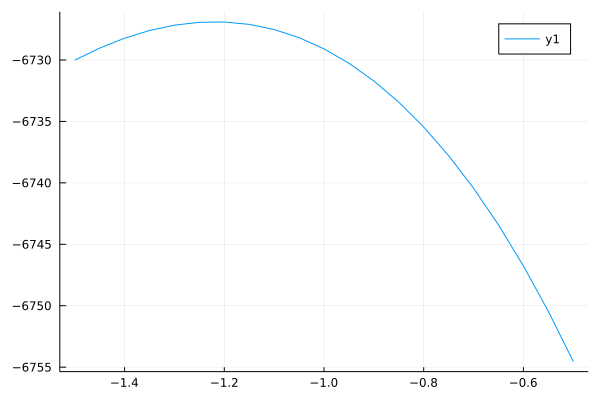

In [32]:
plot(cg_fs, logliks)

In [ ]:
This is the problem. I am clearly not finding the maximum.

In [111]:
miniSARS2_forces2 = Dict{String, Float64}()
for (i, nt) in enumerate(alphabet)
    miniSARS2_forces2[nt] = log(freqs[i])
end

In [113]:
miniSARS2_forces2

Dict{String, Float64} with 4 entries:
  "A" => -1.1881
  "T" => -1.21268
  "C" => -1.69827
  "G" => -1.53805

In [112]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), miniSARS2_forces2)

-6819.694345504127

In [ ]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), miniSARS2_forces2)

In [98]:
count("CG", miniSARS2)

91

In [99]:
count("CG", minibat)

83

In [100]:
count("A", miniSARS2)

1524

In [101]:
count("A", minibat)

1522

In [102]:
count("C", miniSARS2)

915

In [103]:
count("C", minibat)

914

In [104]:
count("G", miniSARS2)

1074

In [105]:
count("G", minibat)

1061

In [107]:
count("T", miniSARS2)

1487

In [106]:
count("T", minibat)

1503

In [116]:
# compute forces
alphabet = ["A", "C", "G", "T"]
motifs = Vector{String}()
freqs = missing

miniSARS2_forces = NoncodingForces_v2_1.DimerForce(string(miniSARS2), motifs; freqs=freqs, add_pseudocount=false)
minibat_forces = NoncodingForces_v2_1.DimerForce(string(minibat), motifs; freqs=freqs, add_pseudocount=false)
;

In [117]:
miniSARS2_forces

Dict{String, Float64} with 4 entries:
  "A" => -1.1881
  "T" => -1.21268
  "C" => -1.69827
  "G" => -1.53805

In [118]:
minibat_forces

Dict{String, Float64} with 4 entries:
  "A" => -1.18941
  "T" => -1.20197
  "C" => -1.69936
  "G" => -1.55023

In [119]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), miniSARS2_forces)

-6819.694345504127

In [120]:
NoncodingForces_v2_1.compute_loglikelihood(string(miniSARS2), minibat_forces)

-6819.860991150563

## Coding forces

TODO